## Ejercicio  - Prueba Técnica
*Mónica Villasuso López* 
**Diciembre 2021**

`Alcance de la prueba`:  
1) Selección de un Data Set  
2) Realización de Análisis Exploratorio de Datos  
3) Probar un modelo de Clasificación y seleccionar el mejor  
4) Preparar un archivo python (.py) para la ejecución  
NOTA: Comentar el jupiter notebook


### (1) SELECCIÓN DEL DATA SET
DATOS A UTILIZAR  Datos de Cncer de Mama (obtenidos del Dataset  disponible en scikit-learn) -

In [1]:
#Imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

import plotly.offline as py
import plotly.graph_objs as go

In [2]:
# Carga del Conjunto de Datos
cancer_ds = datasets.load_breast_cancer()

In [3]:
print( 'Tipo de la estructura que contiene los datos: ', type(cancer_ds))

Tipo de la estructura que contiene los datos:  <class 'sklearn.utils.Bunch'>


In [4]:
cancer_ds

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
cancer_ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# Exploración del contenido del Conjunto de datos  (Atributos o Variables Independientes)
print('Features: ', cancer_ds.feature_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
# Target (Clase o Variable dependiente a predecir con el modelo)
print('Labels: ', cancer_ds.target_names)

Labels:  ['malignant' 'benign']


In [8]:
# Cantidad de Datos
print ('Tipo de la estructura de los datos', type (cancer_ds.data))
print ('Cantidad de  datos:', cancer_ds.data.shape)
print ('Cantidad de  datos - Target:', cancer_ds.target.shape)


Tipo de la estructura de los datos <class 'numpy.ndarray'>
Cantidad de  datos: (569, 30)
Cantidad de  datos - Target: (569,)


In [9]:
# Descripción del contenido del data set
print(cancer_ds['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
# Agregar los datos a un Pandas Dataframe para facilitar la exploración y análisis de los datos
cancer_df = pd.DataFrame(cancer_ds.data, columns = cancer_ds.feature_names)

In [11]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
cancer_df.shape

(569, 30)

In [13]:
#Agrego la columna Target al Dataframe
cancer_df['target'] = cancer_ds.target

-----------------------------------------------------------
### (2) ANÁLISIS EXPLORATORIO DE DATOS  
-----------------------------------------------------------

In [14]:
cancer_df.describe(include = 'all')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
# Verificar si hay registros con valores Nulos  o NaN
cancer_df.isnull().sum().sum()

0

No hay Nulos

In [17]:
# Ver como se distribuyen los datos entre las dos posibles clasificaciones (Malignos o Benignos)
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [18]:
clasif = cancer_df['target'].value_counts()

colors = ['purple', 'lightgreen']

trace = go.Pie(labels = ['Maligno', 'Benigno'],
              values = clasif.values,
               marker = dict(colors = colors),
               name = 'Cáncer de mama',
               hole = 0.3
              )
df = [trace]
layout = go.Layout(title = 'Distribución del Conjunto de Datos')


fig = go.Figure(data = df, layout = layout)
#fig.write_html("distrib.html")

py.iplot(fig)

### Según las columnas, las características se pueden agrupar en 3 subconjuntos:  
Mean (Cols 0 a 9),  
Error (10 a 19) y   
Worst (20 a 29).   
Por esta razón separaré los datos en 3 dataframes (uno para cada caso)

In [19]:
m_col = []
e_col = []
w_col = []

for cols in cancer_df.columns.tolist():
    if cols[:4] == 'mean':
        m_col.append(cols)
    elif cols[-5:] == 'error':
        e_col.append(cols)
    elif cols[:5] == 'worst':
        w_col.append(cols)
    elif cols == 'target':
        m_col.append(cols)
        e_col.append(cols)
        w_col.append(cols)

In [20]:
cancer_df_mean = cancer_df.loc[:,m_col]
cancer_df_error = cancer_df.loc[:,e_col]
cancer_df_worst= cancer_df.loc[:,w_col]

In [21]:
def graf_box (feats, ftitle):
    layout = go.Layout(title = ftitle)
    fig = go.Figure(layout = layout)

    yout = go.Layout(title = ftitle)
    fig = go.Figure(layout = layout)

    colors = ['lightseagreen', 'goldenrod',  'magenta','red','pink','blue','yellow','darkblue','orange', 'purple','cyan']

    for i, elem in enumerate(feats): 
        fig.add_trace(go.Box(y=cancer_df[elem], name=elem, marker_color = colors[i]))

    #fig.write_html('box.html')
    fig.show()

In [22]:
graf_box (m_col,'Mean | Cancer Features')

In [23]:
graf_box (e_col, 'Error | Cancer Features')

In [24]:
graf_box(w_col, 'Worst | Cancer Features')

Debido a que  los valores del atributo area son mucho mayores que el resto, vale la pena analizarlos por separado

In [25]:
a_col=[]
for cols in cancer_df.columns.tolist():
    if  'area' in cols:
        a_col.append(cols)

a_col

['mean area', 'area error', 'worst area']

In [26]:
graf_box(a_col, 'Area | Cancer Features')

Análisis de correlación entre los features y el Target

Ver la correlación del `target` con las columnas del dataframe a ver si nos debemos centrar en algunas para el análisis. Se hace en tres pasos para evaluar con  
Valores medios de las características (columnas 0 a 9)  
Errores (columnas 10 a 19)  
Peor valor (columnas 20 a 29)  

In [27]:
def graf_corr(df):
    dfc = df.corr()
    plt.subplots(figsize=(10, 8)) 
    sns.heatmap(dfc, mask=np.zeros_like(dfc, dtype=np.bool),  cmap= 'BuPu', square=True,  annot=True)
    plt.show()

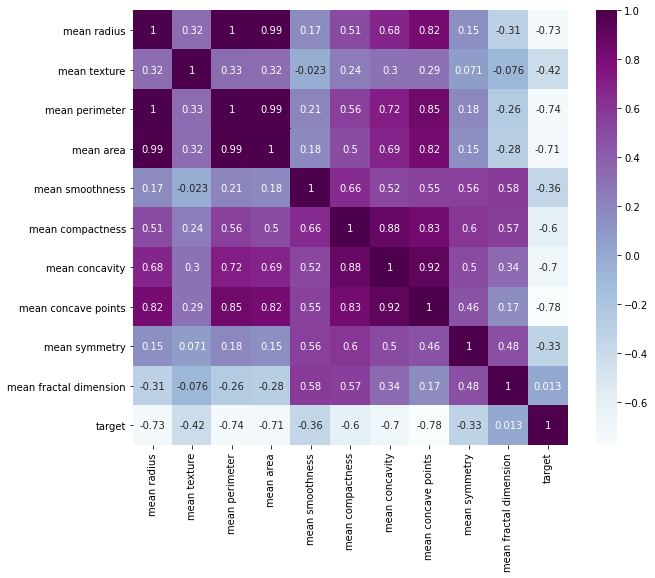

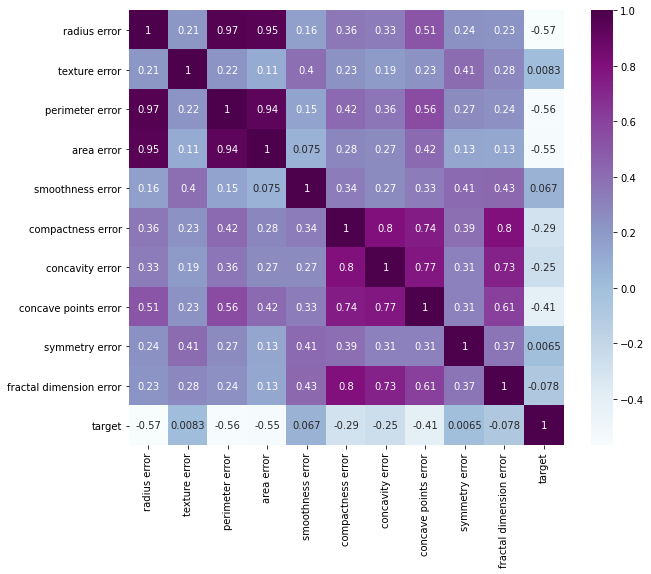

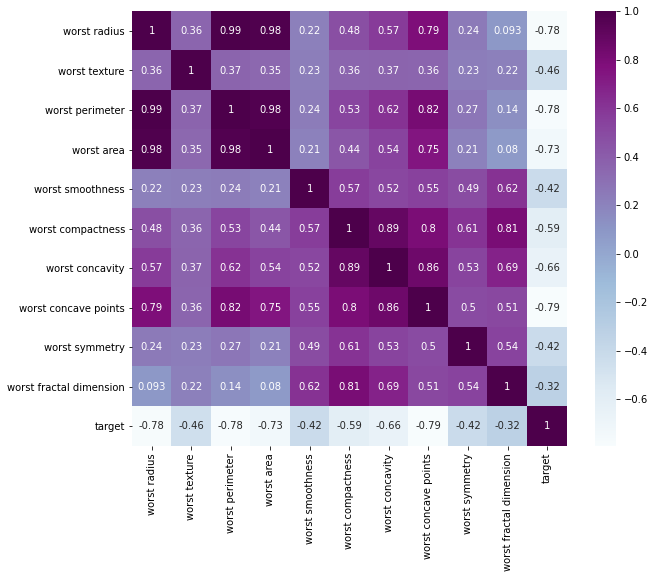

In [28]:

graf_corr(cancer_df_mean)
graf_corr(cancer_df_error)
graf_corr(cancer_df_worst)


In [29]:
#Creación de un df con las features más correlacionadas con el target (Mas de 60% de correlacion)
model_df=  cancer_df[['mean radius', 'mean perimeter', 'mean area', 'mean concavity','mean concave points', 'mean compactness',
'worst radius', 'worst perimeter', 'worst area','worst concave points','worst concavity',
 'target']]


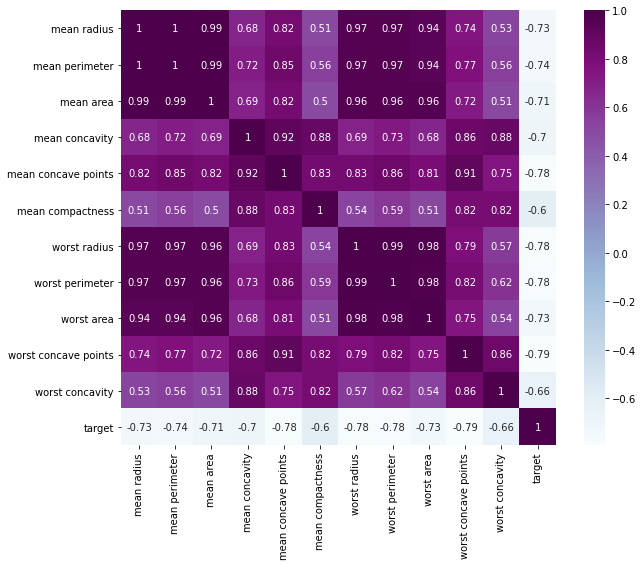

In [30]:
graf_corr(model_df)

In [31]:
#sns.pairplot(cancer_df_mean , hue = "target")

-----------------------------------------------------------
### (3) EVALUACIÓN MEJOR MODELO DE CLASIFICACIÓN  

#### Modelos evaluados: 
* Regresión Logística
* KNN
* SVC
* Random Forest
* XG Boost Clas
-----------------------------------------------------------

In [32]:
#Preparación de los datos (de acuerdo a las variables seleccionadas) para evaluar el mejor modelo de Clasificación
y = model_df['target']
X =  model_df.drop('target', 1)


In [33]:
# Imports necesarios para la selección del modelo  de clasificación
from sklearn.model_selection import train_test_split

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

# Evaluación, Entonación y comparación de modelos
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

In [34]:
# Preparacion de los conjuntos de entrenamiento (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print("X_train:", X_train.shape , " X_test:", X_test.shape, ' y_train:',y_train.shape, ' y_test:', y_test.shape )


X_train: (455, 11)  X_test: (114, 11)  y_train: (455,)  y_test: (114,)


In [35]:
# Parámetros a probar según el modelo de clasificación
pipe = Pipeline(steps=[('classifier', LogisticRegression())])


logistic_params = {
    'classifier': [LogisticRegression()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(0, 4, 10),
    'classifier__max_iter': [400,500, 1000]
    }

kneighbors_params = {
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [3,5,15,20,40,100],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
    }

svm_params = {
    'classifier': [SVC()],
    'classifier__kernel':('linear', 'rbf'), 
    'classifier__C':[0.2, 0.7], 
    'classifier__coef0': [-10.,-1., 0., 1, 10],
    'classifier__gamma': ('scale', 'auto')
    }

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': (10,20)
    }

xgb_params = {
    'classifier': [XGBClassifier()],
    'classifier__n_estimators': (100,500)
    }

model_params = [
    logistic_params,
    kneighbors_params,
    svm_params,
    random_forest_params,
    xgb_params
    ]

### Evaluación del mejor modelo utilizando `GridSearch`  variando los parámetros de cada modelo y usando cross-validation

In [36]:
%%time
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)

clf = GridSearchCV(estimator=pipe, param_grid=model_params, cv = cv, verbose=4, n_jobs=-1)
best_model = clf.fit(X_train, y_train)

# RESULTADO GRID SEARCH
sep = "\n--------------------------------\n"
print(sep)
print('Mejor estimador:', best_model.best_estimator_.get_params()['classifier'], sep)
print('Mejores parámetros', clf.best_params_,sep)
print('Mejor resultado (Estimador y parámetros)', clf.best_score_)



Fitting 12 folds for each of 128 candidates, totalling 1536 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 366 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 1150 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 1478 tasks      | elapsed:  2.2min

--------------------------------

Mejor estimador: LogisticRegression(C=59.94842503189409, max_iter=400) 
--------------------------------

Mejores parámetros {'classifier': LogisticRegression(C=59.94842503189409, max_iter=400), 'classifier__C': 59.94842503189409, 'classifier__max_iter': 400, 'classifier__penalty': 'l2'} 
--------------------------------

Mejor resultado (Estimador y parámetros) 0.9582298297365833
CPU times: user 4.13 s, sys: 347 ms, total: 4.48 s
Wall time: 2min

In [37]:
#Evaluación del modelo con el conjunto de Test
print( 'Conjunto de Test' ,best_model.score(X_test, y_test) * 100, "%")

Conjunto de Test 95.6140350877193 %


In [39]:
#GUARDAR EL  MODELO
import pickle
filename = 'modelo_final.sav'
pickle.dump(best_model, open(filename, 'wb'))